In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Single-variable linear regression Model `without Hidden layer`

간단한 형태인 **선형회귀분석**에서 직선의 기울기`weight`와 절편`bias`가 Gradient Decent를 이용하여 업데이트 되는 과정을 살펴보자. 먼저 **선형회귀분석**에 대해 간단히 설명을 하면 다음과 같다. `회귀분석(regression)`이란 독립변수와 실수인 종속변수가 어떤 연관성과 관계를 갖는지 찾는 방법으로 **선형회귀분석**은 독립변수와 종속변수가 선형 관계라고 가정하는 회귀분석이다.

| $x$ | $y$  |
|:---:|:---:|
|  1 | 1  |
|  2 | 2  |
|  3 | 3  |

$x$와 $y$가 위와 같이 주어져 있다고 했을 때 $x$와 $y$를 잘 설명하는 관계식

$$
H(x) = wx + b
$$

를 찾는 것이 목표다. 즉, 주어진 데이터를 잘 설명하는 $H(x)$의 $w$와 $b$를 찾는 것이 할 수 있다. 실수 $y$값을 예측하는 것이기 때문에 cost 함수는 예측값 $H(x_i)$와 실제값 $y_i$의 차이의 제곱합인 MSE(Mean square error)로 정의할 수 있다.

![](data/mse.png)

$$\begin{align}
cost(w,b) &= \frac{1}{3}\sum_{i=1}^3 \left \{ (H(x_i)-y_i)^2  \right \}\\
& = \frac{1}{3} \left \{(w+b - 1)^2 + (2w+b -2)^2 + (3w + b -3)^2  \right \}
\end{align}
$$

여기서 $x_i$와 $y_i$가 주어져 있기 때문에 cost 함수는 $w$와 $b$의 함수이다. 우리 목표는 다음과 같이 생각할 수 있다.

### 목표 : cost 함수가 최소가 되는 기울기 $w$와 절편 $b$찾기

$$
cost(w,b) = \frac{1}{3} \left \{(w+b - 1)^2 + (2w+b -2)^2 + (3w + b -3)^2  \right \}
$$

- 초깃값 $w_0=2$, $b_0=0$ 그리고 Learning rate $\alpha=0.05$으로 설정

cost 함수의 $w$와 $b$에 관한 편미분을 구해서 $w_1$과 $b_1$를 찾아보자.

$$
\frac{\partial cost(w,b)}{\partial w} = \frac{1}{3} \left( 2(w+b-1) +4(2w+b-2) + 6(3w+b-3) \right)
$$

이므로

$$
\frac{\partial cost(w,b)}{\partial w} \Bigg|_{w=2, b=0} = \frac{1}{3} \left( 2(2+0-1) +4(2\cdot2+0-2) + 6(3\cdot2+0-3) \right) = \frac{28}{3}.
$$

그러므로 $w_1$은 다음과 같이 구할 수 있다.

$$
w_1 = w_0 - \alpha\cdot \frac{\partial cost(w,b)}{\partial w} \Big|_{w=2, b=0} = 2-0.05\cdot\frac{28}{3} = 1.5333...
$$

다음으로 cost

$$
\frac{\partial cost(w,b)}{\partial b} = \frac{1}{3} \left( 2(w+b-1) +2(2w+b-2) + 2(3w+b-3) \right)
$$

이므로

$$
\frac{\partial cost(w,b)}{\partial b} \Bigg|_{w=2, b=0} = \frac{1}{3} \left( 2(2+0-1) +2(2\cdot2+0-2) + 2(3\cdot2+0-3) \right) = 4.
$$

그러므로 $b_1$은 다음과 같이 구할 수 있다.

$$
b_1 = b_0 - \alpha\cdot \frac{\partial cost(w,b)}{\partial b} \Big|_{w=2, b=0} = 0-0.05\cdot 4 = -0.2
$$

Gradient Decent 알고리즘을 이용하여 $w$와 $b$가 초깃값 $(w_0, b_0) = (2,0)$에서 $(w_1, b_1) = (1.5333,-0.2)$로 업데이트 된 것을 확인 할 수 있다. 같은 방법으로 $w_2$와 $b_2$, $w_3$와 $b_4$....를 반복적으로 구할 수 있다. $w_n$과 $b_n$의 극한값이 우리가 원하는 기울기 $w$와 절편 $b$값이다.

### 이 과정을 `TensorFlow code`로 작성하면 다음과 같이 작성 할 수 있다.

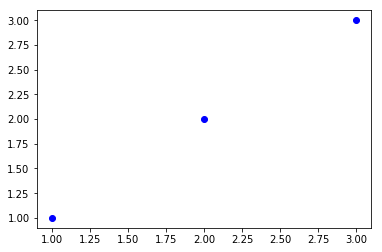

In [2]:
x_data = [[1],
          [2],
          [3]]
y_data = [[1],
          [2],
          [3]]

_ = plt.plot(x_data, y_data, "bo")

In [3]:
X = tf.placeholder(dtype=tf.float32, shape=[None,1])
Y = tf.placeholder(dtype=tf.float32, shape=[None,1])

W = tf.Variable(2, dtype=tf.float32)
b = tf.Variable(0, dtype=tf.float32)

H = X * W + b

loss = tf.reduce_mean(tf.square(H-Y))

train = tf.train.GradientDescentOptimizer(learning_rate = 0.05).minimize(loss)

W : 2.0,	 b : 0.0


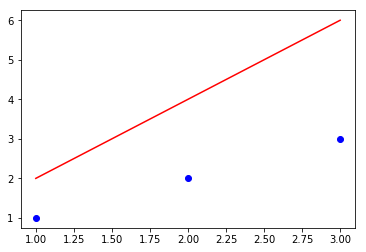

In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
W_value, b_value = sess.run((W,b))
print("W : %s,\t b : %s" %(W_value, b_value))
plt.show()
_ = plt.plot(x_data, y_data, "bo")
_ = plt.plot(x_data, 2*np.array(x_data) + 0, "r-")


W : 1.53333,	 b : -0.2


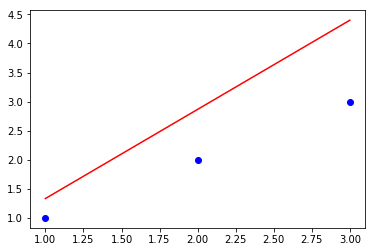


W : 1.32444,	 b : -0.286667


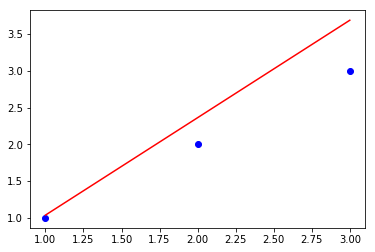


W : 1.23037,	 b : -0.322889


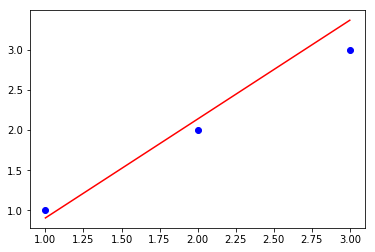


W : 1.18744,	 b : -0.336674


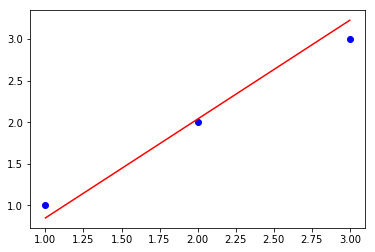


W : 1.1673,	 b : -0.340495


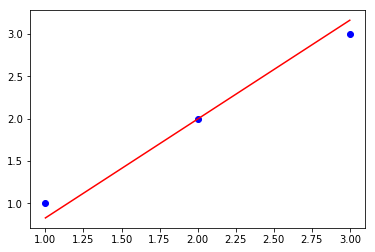


W : 1.15733,	 b : -0.339906


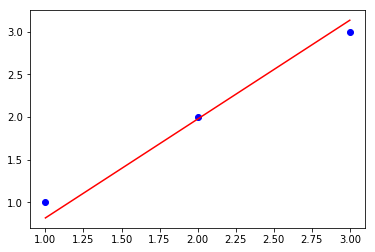


W : 1.15189,	 b : -0.337381


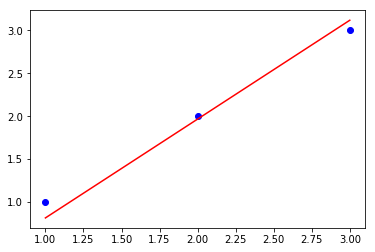


W : 1.14848,	 b : -0.334021


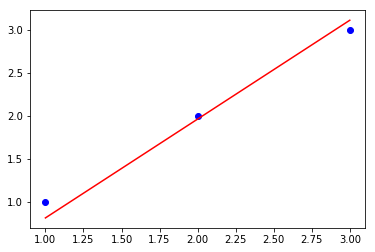


W : 1.146,	 b : -0.330316


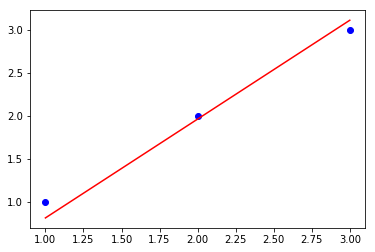


W : 1.14393,	 b : -0.326483


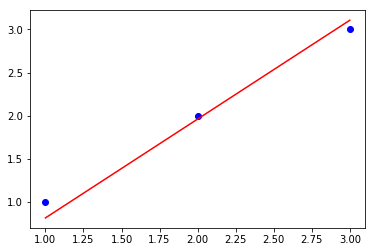

In [5]:
iteration = 10
for step in range(iteration):
    _, cost, W_value, b_value = sess.run([train, loss, W, b], feed_dict={X:x_data, Y:y_data})
    plt.show()
    print("\nW : %s,\t b : %s" %(W_value, b_value))
    plt.plot(x_data, y_data, "bo")
    plt.plot(x_data, W_value*np.array(x_data) + b_value, "r-")
        